In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regex as re
import nltk
import sklearn
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
import torch


In [2]:
device = torch.device('mps')
print('Using device:', device)

Using device: mps


In [3]:
########## Question 1
cats = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
newsgroups_all = fetch_20newsgroups(subset='all', categories = cats, shuffle=True, random_state=0, remove=('headers','footers'))
data = pd.DataFrame(newsgroups_all.data)

cuntVectorizer = CountVectorizer(stop_words='english', min_df=3)
tfidf = TfidfTransformer(use_idf=True)

wordCounts = tfidf.fit_transform(cuntVectorizer.fit_transform(newsgroups_all.data))
wordCounts = pd.DataFrame(data=wordCounts.toarray(), columns=cuntVectorizer.get_feature_names_out())
y_true = [0 if label < 4 else 1 for label in newsgroups_all.target]

print("There are "+str(wordCounts.shape[0])+" samples and "+str(wordCounts.shape[1])+" features.")

There are 7882 samples and 23522 features.


In [4]:
########## Question 2
kmeans = KMeans(init='k-means++', max_iter=1000, n_clusters=2, n_init=30, random_state=0)
kmeans.fit(wordCounts)


KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

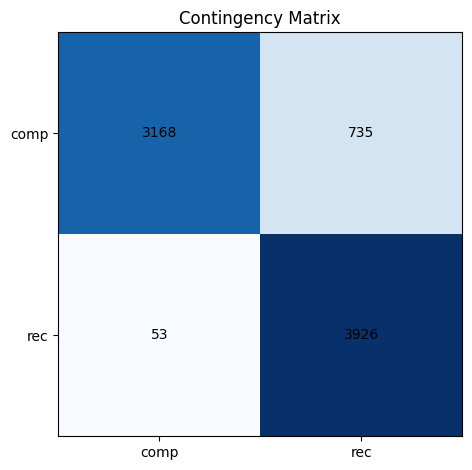

In [8]:
def plot_matrix(matrix, labels, title):
    # matrix: numpy array of shape (n_classes, n_classes)
    # labels: list of length n_classes containing class labels
    
    fig, ax = plt.subplots()
    im = ax.imshow(matrix, cmap='Blues')
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, matrix[i, j],
                           ha="center", va="center", color="black")

    ax.set_title(title)
    fig.tight_layout()
    plt.show()
y_pred = kmeans.labels_
contingencyMatrix = contingency_matrix(y_true,y_pred)
binaryLabels = ['comp', 'rec']

plot_matrix(contingencyMatrix, binaryLabels, "Contingency Matrix")


In [9]:
print("The homogeneity is "+str(homogeneity_score(y_true, y_pred)))
print("The completeness is "+str(completeness_score(y_true, y_pred)))
print("The V-measure is "+str(v_measure_score(y_true, y_pred)))
print("The adjusted rand index is "+str(adjusted_rand_score(y_true, y_pred)))
print("The adjusted mutual information score is "+str(adjusted_mutual_info_score(y_true, y_pred)))

The homogeneity is 0.5786933027101565
The completeness is 0.5930127784164637
The V-measure is 0.5857655410667186
The adjusted rand index is 0.6400359369002737
The adjusted mutual information score is 0.5857271539449475


In [ ]:
########## Question 14